# LIJ Plant Efficiency Project: Results Visualization Section

##### All numbers not calculated in this section can be found by year in the GitHub repository. All graphs should speak for themselves and demonstrate concise results. 

##### Cogen and trigen are often used interchangeably because the system operates like most cogeneration plants but resulting steam has multiple purposes, making this technically a trigeneration plant. 

The below graph shows the efficiency of both the boiler plant and the trigeneration plant year by year. The calculation for these efficiencies is based on conservation of energy. Units were all converted to therms and electricity conversions assumed a carnot efficiency.

The results show no major difference in efficiency with both systems hovering around 80%

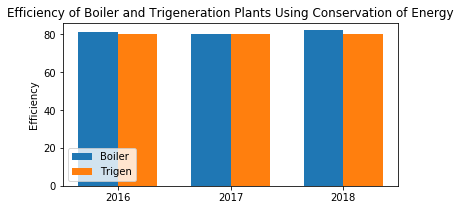

In [123]:
fig = plt.figure(figsize=(6,3))
N = 3
boiler_eff = (81.2, 79.9, 82.0)
cogen_eff = (80.2, 80.2, 80.2)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, boiler_eff, width, label='Boiler')
plt.bar(ind + width, cogen_eff, width, label='Trigen')

plt.ylabel('Efficiency')
plt.title('Efficiency of Boiler and Trigeneration Plants Using Conservation of Energy')

plt.xticks(ind + width / 2, ('2016', '2017', '2018'))
plt.legend(loc='lower left')
plt.show()

Athough the energy efficiencies of both systems are equal it does not tell the full story, mainly because each system produces a different type of power. Both produce steam but trigeneration produces electricity as well. According to the standards outlined in Local Law 97, the below graph shows the difference in Co2 required to produce each unit of energy. 

kWh are far more energy intensive to produce than kbtu but the conservation of energy used in the efficiency calculations does not account for this disparity because it is forced to assume a theoretical energy conversion rate. A comprehensive analysis will need to normalize the efficiency ratings for systems with different energy types. 

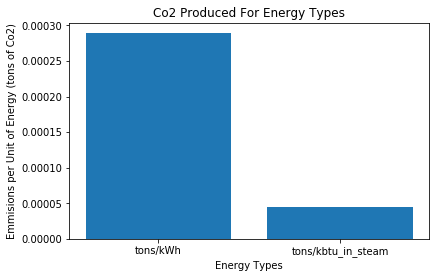

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))

energy_type = ['tons/kWh', 'tons/kbtu_in_steam']
values = [0.00028896, 0.00004493]

ax = fig.add_axes([0,0,1,1])
ax.bar(energy_type,values)
plt.xticks(rotation=0)
plt.title('Co2 Produced For Energy Types')
plt.xlabel('Energy Types')
plt.ylabel('Emmisions per Unit of Energy (tons of Co2)')

plt.show()

Instead of using efficiency as a benchmark, the next peice of this analysis uses only data from Local Laws 95 and 97 to calculate Co2 emissions for both LIJ's trigen unit and NYC's utility providers for the relevant district. This is done by evaluating the trigen inputs and trigen outputs;

    - Inputs are in kbtu, which corresponds to the utilities output in Co2
    - Output are kWh and kbtu, which correspond to the utilities output in Co2
    
Results prove that their is actually less Co2 released when energy is produced in house. This is an indepenent section that draws the same conclusion as it does with LIJ specific data. The margin of Co2 saved anually is the difference between the two and represented in green.

In [125]:
delivered_kwh = 0.00028896     # tons of Co2 per kWh
delivered_kbtu = 0.00004493    # tons of Co2 per kbtu in district steam

'Values Produced By Trigen Plant'
kbtu_in_2016 = 75163500
kwh_out_2016 = 7710200
kbtu_out_2016 = 33934800

kbtu_in_2017 = 85447100
kwh_out_2017 = 8765100
kbtu_out_2017 = 38577800

kbtu_in_2018 = 79379600
kwh_out_2018 = 8142700
kbtu_out_2018 = 35838400

def co2_produced(kbtu_in, kwh_out, kbtu_out):
    co2_production_if_delivered = (kwh_out * delivered_kwh) + (kbtu_out * delivered_kbtu)
    actual_co2_production = (kbtu_in * delivered_kbtu)
    co2_saved = co2_production_if_delivered - actual_co2_production
    return (co2_production_if_delivered, actual_co2_production, co2_saved)

co2_2016 = co2_produced(kbtu_in_2016, kwh_out_2016, kbtu_out_2016)
co2_2017 = co2_produced(kbtu_in_2017, kwh_out_2017, kbtu_out_2017)
co2_2018 = co2_produced(kbtu_in_2018, kwh_out_2017, kbtu_out_2018)

print(co2_2016)
print(co2_2017)
print(co2_2018)

(3752.6299559999998, 3377.096055, 375.5339009999998)
(4266.0638500000005, 3839.138203, 426.9256470000005)
(4142.982608, 3566.525428, 576.4571800000003)


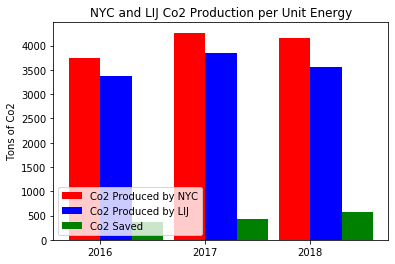

In [126]:
import numpy as np

N = 3
co2_nyc = (3753, 4266, 4152)
co2_lij = (3377, 3839, 3567)
co2_saved = (376, 427, 576)

ind = np.arange(N) 
width = 0.3     
plt.bar(ind, co2_nyc, width, color = 'r', label='Co2 Produced by NYC')
plt.bar(ind + width, co2_lij, width, color = 'b', label='Co2 Produced by LIJ')
plt.bar(ind + width + width, co2_saved, width, color = 'g', label='Co2 Saved')

plt.ylabel('Tons of Co2')
plt.title('NYC and LIJ Co2 Production per Unit Energy')

plt.xticks(ind + width / 2, ('2016', '2017', '2018'))
plt.legend(loc='lower left')
plt.show()

The following block normalizes the efficiency ratings with a kWh to kbtu conversion rate that accounts for energy losses. This is an accurate representation of the economic bennifit to the hospital for producing electricity. Added expenses making up the profit margins of energy providers is not included in previous analysis and is not accounted for in Local Laws 95 or 97. This is a closer depiction of how much money is saved through use of trigeneration. Results come from subtracting raw efficiencies from 'economy ratios' which were determined for each year in other project repositories. 

Results show a decrease in boiler economy because all inputs and outputs are in the form of heat. The negative number for boilers is just a result of the maintenance cost. Trigeneration produces steam and electricity. Since electricity is more expensive than its equivalent energy in heat, the determined return on investment is about 73% annually. This does not account for initial expenses. 

RoI was determined by converting all energy into to dollar values and calculating `dollar_equivalent_out/dollar_equivalent_in`. In the case of Trigeneration the resulting equation was `Nc_econ = (savings_kwh + savings_therms) / (cost_therms + cost_maintence`. Full calculations are in the GitHub repository under each year's project. 

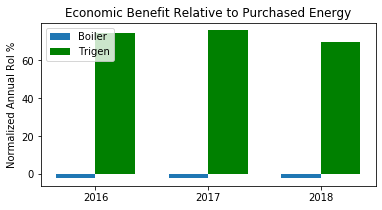

In [127]:
fig = plt.figure(figsize=(6,3))
N = 3
# Each of the below values are the economic efficiency - raw efficincy 
# Economic efficiency used a conversion rate for kwh to therms retreived from: https://www.metric-conversions.org/energy-and-power/kilowatt-hours-to-therms-us.htm
# These values are the difference in value of inputs and value of output energy assuming the conversion was perfectly efficient.
# This assumption is suitable because the values are being compared against a reference point and both boiler and cogen have roughly the same efficiency.
# The percentages will be used to determine economic value of equiptment output which makes the current efficieny a multiplication factor of 1
boiler_eff = (-2.33, -2.09, -2.23)
cogen_eff = (74.39, 75.84, 69.34)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, boiler_eff, width, label='Boiler')
plt.bar(ind + width, cogen_eff, width, color='g', label='Trigen')

plt.ylabel('Normalized Annual RoI %')
plt.title('Economic Benefit Relative to Purchased Energy')

plt.xticks(ind + width / 2, ('2016', '2017', '2018'))
plt.legend(loc='upper left')
plt.show()

When isolating the expenses put into cogeneration and multiplying by the return on investment, savings in dollars can be determined. This cogeneration is estimated to save about $600,000 annually.

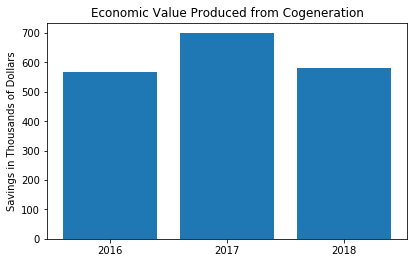

In [128]:
'Fixed Annual Costs to Run The Cogeneration Plant'
cogen_total_costs_2016 = 772.168
cogen_total_costs_2017 = 922.745
cogen_total_costs_2018 = 837.193

'Normalized Efficiencies'
ne_2016 = 0.7329
ne_2017 = 0.7584
ne_2018 = 0.6934

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))

energy_type = ['2016', '2017', '2018']
values = [cogen_total_costs_2016 * ne_2016, cogen_total_costs_2017 * ne_2017, cogen_total_costs_2018 * ne_2018]

ax = fig.add_axes([0,0,1,1])
ax.bar(energy_type,values)
plt.xticks(rotation=0)
plt.title('Economic Value Produced from Cogeneration')
plt.ylabel('Savings in Thousands of Dollars')

plt.show()